## Урок 2. Домашнее задание

#### __Задание__

Используем набор примеров fashion-MNIST

1.  Опишите - какой результат получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

#### __Решение__

Импортируем необходимые для обучения библиотеки.

In [84]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import CategoricalCrossentropy
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

Сформируем обучающую и тестовую выборки на основе датасета `fashion_mnist`.

In [85]:
(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()

# приведем изображение к диапазону (-1,1).
train_images = (train_imagesi / 127) - 1
test_images = (test_imagesi / 127) - 1

# делаем векторизацию, т.к. наши слои полносвязные и хотят на вход вектор.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

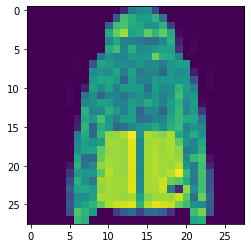

In [86]:
plt.imshow(train_imagesi[22,:,:])
plt.show()

Размеры выборок:

In [87]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [88]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

В представленном датасете мы имеем дело с 10 уникальными классами одежды.

С помощью OHE преобразуем метки классов в обучающей и тестовой выборках.

In [89]:
y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

Построим для начала двуслойные нейросети с разным количеством нейронов во внутреннем слое и проверим каким образом это влияет на метрику модели:

In [90]:
n = [50, 100, 150, 200]

for inner in n:
  model = Sequential(name='my_model')
  model.add(Dense(128, activation='relu', input_shape=(784,)))  
  model.add(Dense(inner, activation='tanh')) 
  model.add(Dense(10, activation='softmax'))

  # Компилируем сеть с оптимизатором , функцией потерь и метрикой

  model.compile(
    optimizer='adam', # оптимизатор
    loss=CategoricalCrossentropy(), # функция потерь
    metrics=['accuracy'], # метрика
  ) 


  # Обучаем сеть

  hh = model.fit(  
    train_images[:,:],
    y_t[:,:],
    epochs=15,
    batch_size=32, 
    validation_split=0.2,
    verbose=0
  )

  # Оцениваем качество

  test_loss, test_acc = model.evaluate(test_images, y_tt, verbose=0)

  print(f'Количество нейронов во внутреннем слое двухслойной сети {inner}: '
        f'Accuracy на трейне - {hh.history.get("accuracy")[-1]:.6f}; '
        f'Accuracy на тесте - {test_acc:.6f}')

Количество нейронов во внутреннем слое двухслойной сети 50: Accuracy на трейне - 0.918458; Accuracy на тесте - 0.875500
Количество нейронов во внутреннем слое двухслойной сети 100: Accuracy на трейне - 0.920604; Accuracy на тесте - 0.871600
Количество нейронов во внутреннем слое двухслойной сети 150: Accuracy на трейне - 0.927625; Accuracy на тесте - 0.875800
Количество нейронов во внутреннем слое двухслойной сети 200: Accuracy на трейне - 0.928479; Accuracy на тесте - 0.879400


Видим, что метрика `Accuracy` модели немного улучшилась при увеличении количества нейронов до 200 во внутреннем слое. При этом рост на тесте меньше роста на трейне, что может указывать на наличие переобучения.

In [99]:
def train_evaluate_model(model, epochs=15, batch_size=32, optimizer='adam'):
  # Компилируем сеть с оптимизатором , функцией потерь и метрикой

  model.compile(
    optimizer=optimizer, # оптимизатор
    loss=CategoricalCrossentropy(), # функция потерь
    metrics=['accuracy'], # метрика
  ) 


  # Обучаем сеть

  hh = model.fit(  
    train_images[:,:],
    y_t[:,:],
    epochs=epochs,
    batch_size=32, 
    validation_split=0.2,
    verbose=0
  )

  # Оцениваем качество

  test_loss, test_acc = model.evaluate(test_images, y_tt, verbose=0)

  return hh.history.get("accuracy")[-1], test_acc

In [92]:
model_2layer = Sequential(name='2_Layer_model')
model_2layer.add(Dense(128, activation='relu', input_shape=(784,)))  
model_2layer.add(Dense(190, activation='tanh')) 
model_2layer.add(Dense(10, activation='softmax'))
print(f'Количество параметров в модели двухслойной сети - '
      f'{model_2layer.count_params()}.')


train_acc, test_acc = train_evaluate_model(model_2layer)

print(f'Accuracy на трейне - {train_acc:.6f}; '
      f'Accuracy на тесте - {test_acc:.6f}.')

Количество параметров в модели двухслойной сети - 126900.
Accuracy на трейне - 0.929250; Accuracy на тесте - 0.882500.


In [93]:
model_3layer = Sequential(name='3_Layer_model')
model_3layer.add(Dense(128, activation='relu', input_shape=(784,)))  

for k in range(2):
  model_3layer.add(Dense(10+(10-k)*10, activation='tanh')) 

model_3layer.add(Dense(10, activation='softmax')) 
print(f'Количество параметров в модели трехслойной сети - '
      f'{model_3layer.count_params()}.')

train_acc, test_acc = train_evaluate_model(model_3layer)

print(f'Accuracy на трейне - {train_acc:.6f}; '
      f'Accuracy на тесте - {test_acc:.6f}.')


Количество параметров в модели трехслойной сети - 126780.
Accuracy на трейне - 0.922833; Accuracy на тесте - 0.877200.


In [94]:
model_5layer = Sequential(name='5_Layer_model')
model_5layer.add(Dense(128, activation='relu', input_shape=(784,)))  

for k in range(4):
  model_5layer.add(Dense(10+(7-k)*10, activation='tanh')) 

model_5layer.add(Dense(10, activation='softmax')) 
print(f'Количество параметров в модели пятислойной сети - '
      f'{model_5layer.count_params()}.')

train_acc, test_acc = train_evaluate_model(model_5layer)

print(f'Accuracy на трейне - {train_acc:.6f}; '
      f'Accuracy на тесте - {test_acc:.6f}.')

Количество параметров в модели пятислойной сети - 124290.
Accuracy на трейне - 0.910479; Accuracy на тесте - 0.874300.


In [95]:
model_10layer = Sequential(name='10_Layer_model')
model_10layer.add(Dense(128, activation='relu', input_shape=(784,)))  

for k in range(9):
  model_10layer.add(Dense(10 + k*10, activation='tanh')) 

model_10layer.add(Dense(10, activation='softmax')) 
print(f'Количество параметров в модели десятислойной сети - '
      f'{model_10layer.count_params()}.')

train_acc, test_acc = train_evaluate_model(model_10layer)

print(f'Accuracy на трейне - {train_acc:.6f}; '
      f'Accuracy на тесте - {test_acc:.6f}.')

Количество параметров в модели десятислойной сети - 127120.
Accuracy на трейне - 0.890604; Accuracy на тесте - 0.851500.


В данном случае оказалось, что лучшие результаты на тесте показала двухслойная модель. При дальнейшем увеличении слоев качество модели ухудшается, но можно отметить, что одновременно сокращается переобучение.

Оптимизатор - SGD: Accuracy на трейне - 0.901583; Accuracy на тесте - 0.874900.
Оптимизатор - RMSProp: Accuracy на трейне - 0.903396; Accuracy на тесте - 0.874000.
Оптимизатор - adam: Accuracy на трейне - 0.918250; Accuracy на тесте - 0.879000.
Оптимизатор - NAdam: Accuracy на трейне - 0.920708; Accuracy на тесте - 0.881600.


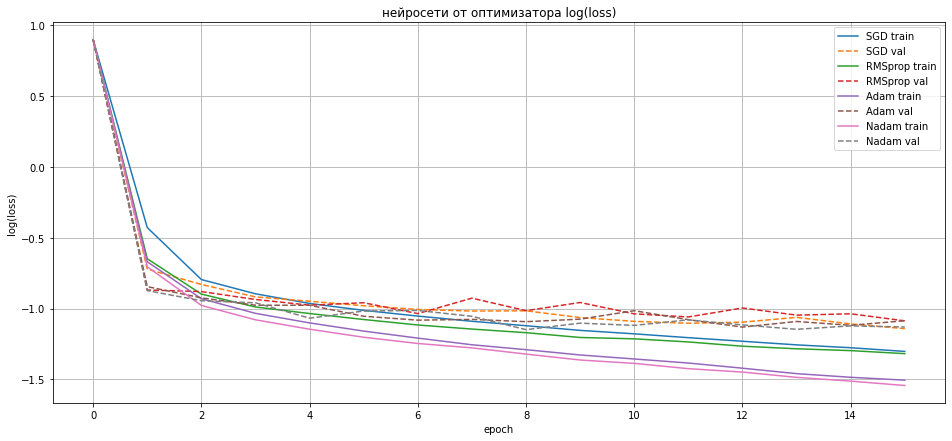

In [97]:
# создаем модель model
model = Sequential(name='2_Layer_model')
model.add(Dense(128, activation='relu', input_shape=(784,)))  
model.add(Dense(50, activation='tanh')) 
model.add(Dense(10, activation='softmax'))

# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15

# вектор для вывода результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы

for i_optim in ['SGD','RMSProp','adam','NAdam']:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential(name='2_Layer_model')
  modeli.add(Dense(128, activation='relu', input_shape=(784,)))  
  modeli.add(Dense(50, activation='tanh')) 
  modeli.add(Dense(10, activation='softmax'))
  
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  
  # проводим обучение модели 
  hh = modeli.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=32, 
                  validation_split=0.2, 
                  verbose = 0
                  )
  
  test_loss, test_acc = modeli.evaluate(test_images, y_tt, verbose=0)
  print(f'Оптимизатор - {i_optim}: '
        f'Accuracy на трейне - {hh.history.get("accuracy")[-1]:.6f}; '
        f'Accuracy на тесте - {test_acc:.6f}.')

  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')



plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

Полученные результаты позволяют сделать вывод о том, что наилучшая метрика на тесте достигается при использовании оптимизатора NAdam. Однако разница с другими доступными оптимизаторами не очень велика. Хуже всего показал `RMSProp`, использующийся по умолчанию.

График ошибок позволяет утверждать, что на валидационном датасете ошибка модели мало различается при использовании разных оптимизаторов.

Попробуем еще обучить модель для разного количества эпох:

In [100]:
model_2layer = Sequential(name='2_Layer_model')
model_2layer.add(Dense(128, activation='relu', input_shape=(784,)))  
model_2layer.add(Dense(50, activation='tanh')) 
model_2layer.add(Dense(10, activation='softmax'))


epochs = [10, 15, 20]
for epoch in epochs:
  train_acc, test_acc = train_evaluate_model(model_2layer, epochs=epoch, optimizer='NAdam')

  print(f'Количество эпох - {epoch}: Accuracy на трейне - {train_acc:.6f}; '
        f'Accuracy на тесте - {test_acc:.6f}.')

Количество эпох - 10: Accuracy на трейне - 0.907354; Accuracy на тесте - 0.869200.
Количество эпох - 15: Accuracy на трейне - 0.938417; Accuracy на тесте - 0.879100.
Количество эпох - 20: Accuracy на трейне - 0.956521; Accuracy на тесте - 0.877100.


Видно, что при увеличении количества эпох возрастает переобучение модели, при этом метрика на тесте практически не увеличивается.

В целом видно, что различия между моделями довольно незначительны и зачастую в большой степени связаны со случайным элементом. Построим матрицу ошибок для итоговой модели - двухслойная сеть, в которой 150 нейронов во внутреннем слое, 15 эпох обучения:

In [105]:
model = Sequential(name='2_Layer_model')
model.add(Dense(128, activation='relu', input_shape=(784,)))  
model.add(Dense(50, activation='tanh')) 
model.add(Dense(10, activation='softmax'))

train_evaluate_model(model, optimizer='NAdam')

y_pred = model.predict(test_images[:,:])
y_pred_class = np.argmax(y_pred,axis=1)

confusion_matrix(test_labels, y_pred_class)

array([[809,   0,  28,  26,   4,   3, 119,   1,  10,   0],
       [  1, 964,   0,  27,   3,   0,   3,   0,   2,   0],
       [ 11,   3, 772,  12, 117,   1,  78,   1,   5,   0],
       [ 18,   5,  17, 890,  45,   0,  21,   0,   4,   0],
       [  1,   2,  72,  30, 836,   0,  57,   0,   2,   0],
       [  0,   0,   0,   0,   0, 930,   0,  55,   1,  14],
       [104,   1,  80,  32,  72,   1, 694,   2,  14,   0],
       [  0,   0,   0,   0,   0,  14,   0, 949,   0,  37],
       [  5,   0,   2,   4,   6,   6,   7,  10, 960,   0],
       [  1,   0,   0,   0,   0,  15,   0,  39,   0, 945]])

Посчитаем полноту и точность для каждого из классов:

In [106]:
recall_score(test_labels, y_pred_class, labels=np.unique(test_labels), average=None)

array([0.809, 0.964, 0.772, 0.89 , 0.836, 0.93 , 0.694, 0.949, 0.96 ,
       0.945])

In [107]:
precision_score(test_labels, y_pred_class, labels=np.unique(test_labels), average=None)

array([0.85157895, 0.98871795, 0.79505664, 0.87169442, 0.77192982,
       0.95876289, 0.70888662, 0.89782403, 0.96192385, 0.94879518])

In [108]:
f1_score(test_labels, y_pred_class, labels=np.unique(test_labels), average=None)

array([0.82974359, 0.97620253, 0.7833587 , 0.8807521 , 0.80268843,
       0.94416244, 0.70136433, 0.92270297, 0.96096096, 0.94689379])

В целом метрики полноты и точности получились довольно высокие, только для одного из классов заметна сильная просадка по качеству, так как `f1_score` равен всего 0.71.